In [2]:
import networkx as nx
import os
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import datetime
import pytz
import matplotlib.pyplot as plt
import preprocessing as prep
from collections import namedtuple
from bb_binary import FrameContainer, Repository, load_frame_container
import numpy as np
import numpy.ma as npma
import datetime
import csv

In [70]:
import igraph as ig

In [3]:
%matplotlib inline

In [4]:
Detection = namedtuple('Detection', ['idx', 'xpos', 'ypos', 'radius', 'zRotation', 'decodedId', 'frame_idx', 'timestamp', 'cam_id', 'fc_id'])

In [5]:
def getDF(path, b, e, camID):
    repo = Repository(path)
    
    tpls = []
    myid = 0


    for frame, fc in repo.iter_frames(begin=b, end=e, cam=camID):
        for d in frame.detectionsUnion.detectionsDP:
            d = Detection(d.idx, d.xpos, d.ypos, d.radius, d.zRotation, list(d.decodedId), myid, frame.timestamp, fc.camId, fc.id)
            tpls.append(d)
        myid += 1

    df = DataFrame(tpls)
    return df

In [6]:
start = "2016-07-21T00:00:00Z"
start_dt = datetime.datetime.strptime(start, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=pytz.UTC)
start_ts = start_dt.timestamp()
end_dt = start_dt + datetime.timedelta(minutes=60)
end_ts = end_dt.timestamp()

In [8]:
df = getDF("/mnt/data2016/",start_ts, end_ts, 3)

In [9]:
len(df.frame_idx.unique())

10837

In [10]:
prep.calcIds(df, 0.99, 2015).head(3)

,idx,xpos,ypos,radius,zRotation,frame_idx,timestamp,cam_id,fc_id,confidence,id
5,5,488,701,22.686844,1.733468,0,1.469059e+09,3,15758691713769710420,1.0,1324
6,6,486,825,22.852934,2.802199,0,1.469059e+09,3,15758691713769710420,1.0,62
7,7,500,2974,22.750666,-2.702166,0,1.469059e+09,3,15758691713769710420,1.0,1614


In [11]:
prep.calcIds(df, 0.99, 2016).head(3)

,idx,xpos,ypos,radius,zRotation,frame_idx,timestamp,cam_id,fc_id,confidence,id
5,5,488,701,22.686844,1.733468,0,1.469059e+09,3,15758691713769710420,1.0,2649
6,6,486,825,22.852934,2.802199,0,1.469059e+09,3,15758691713769710420,1.0,125
7,7,500,2974,22.750666,-2.702166,0,1.469059e+09,3,15758691713769710420,1.0,3228


# Look at the network

In [81]:
g = nx.read_graphml("test2016day_0.99conf_160dist_6ilen.graphml")

In [82]:
stat = prep.network_statistics(g)

In [83]:
stat

{'av_deg': 157.77426312005753,
 'av_shortest_path': 2.2693057631536755,
 'cc': 0.29647721640935665,
 'components': 1,
 'degree': dict_values([1, 15, 42, 136, 4, 382, 78, 129, 174, 261, 226, 3, 236, 169, 212, 1, 150, 254, 57, 138, 1, 2, 1, 203, 150, 119, 76, 124, 2, 233, 1, 268, 366, 2, 2, 154, 262, 321, 414, 151, 333, 1, 245, 262, 7, 1, 165, 240, 189, 293, 114, 169, 247, 467, 115, 1, 338, 346, 260, 1, 1, 1, 291, 171, 234, 73, 1, 280, 397, 245, 3, 3, 288, 139, 313, 1, 1, 79, 2, 158, 163, 100, 1, 2, 3, 340, 261, 113, 1, 76, 248, 2, 337, 2, 286, 1, 1, 273, 408, 123, 337, 109, 50, 2, 1, 2, 91, 1, 292, 1, 195, 1, 333, 2, 180, 1, 326, 33, 1, 280, 315, 338, 27, 1, 521, 344, 167, 213, 47, 135, 169, 286, 190, 523, 1, 220, 272, 18, 162, 418, 2, 384, 1, 2, 1, 145, 265, 335, 423, 140, 192, 1, 153, 175, 12, 68, 376, 367, 128, 87, 1, 282, 112, 197, 222, 215, 66, 471, 130, 1, 147, 276, 251, 1, 264, 187, 1, 99, 2, 2, 1, 1, 1, 2, 359, 385, 70, 182, 181, 304, 234, 109, 59, 1, 393, 230, 143, 5, 169, 1, 2

In [92]:
l = []
for n in g.nodes_iter():
#     if get_hatchdate(int(n)) == None:
    n = int(float(n))
    l.append((n,get_age(n, start_dt)))

In [93]:
s = DataFrame(l, columns=["id", "age"])

In [94]:
s.head(2)

,id,age
0,1441,-8.0
1,3886,0.0


In [96]:
len(s[s.age<0])

110

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


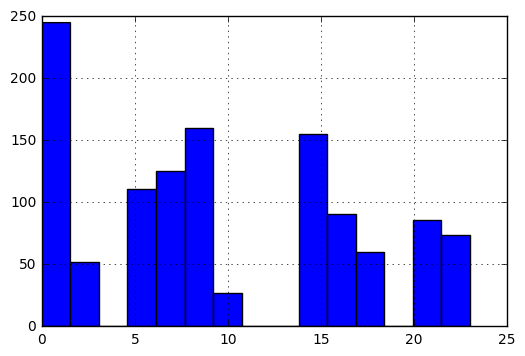

In [103]:
s.dropna()[s.age >= 0].age.hist(bins=15)

In [104]:
s.dropna().describe()

,id,age
count,1296.000000,1296.000000
mean,2081.756944,7.595679
std,1168.262622,9.870909
min,5.000000,-33.000000
25%,1117.750000,1.000000
50%,2023.500000,8.000000
75%,3081.750000,15.000000
max,4092.000000,23.000000


In [60]:
# kcc = list(nx.community.k_clique_communities(g,4))

In [61]:
a = []

In [62]:
for e, group in enumerate(kcc):
    for g in group:
        a.append((e,g))

In [63]:
dfkcc = DataFrame(a, columns=["group", "bee"])

In [64]:
dfkcc["age"] = dfkcc.bee.apply(lambda x: get_age(int(x), start_dt))

In [66]:
dfkcc.groupby(by="group").age.mean()

group
0     13.000000
1     10.545455
2      0.000000
3      1.800000
4      6.250000
5      2.300000
6     11.333333
7      9.000000
8      5.000000
9      7.000000
10     0.750000
11     8.600000
12    10.111111
13     4.750000
14     3.750000
15     4.250000
16    11.000000
17     9.500000
18     9.000000
19     8.750000
20     0.750000
21    11.750000
22    10.750000
23     9.750000
24     8.000000
25     5.250000
26     9.000000
27     8.400000
28     9.500000
29     5.750000
30     6.000000
31     2.500000
32     9.500000
33    11.250000
34     8.250000
35    11.250000
36     2.250000
Name: age, dtype: float64

In [67]:
dfkcc.groupby(by="group").size()

group
0      4
1     11
2      4
3      5
4      8
5     10
6      6
7      4
8      4
9      6
10     4
11     5
12     9
13     4
14     4
15     8
16     4
17     4
18     7
19     4
20     4
21     4
22     4
23     4
24     4
25     4
26     4
27     5
28     4
29     4
30     4
31     4
32     4
33     4
34     4
35     4
36     4
dtype: int64

In [17]:
def get_mean_age(ages):
    #  Input: object array (ages of bee group)
    # Output: float (mean)
    if any(age is not None for age in ages):
        return np.mean(ages)
    else:
        return npma.masked_equal(ages, None).mean()
    
def get_std_age(ages):
    #  Input: object array (ages of bee group)
    # Output: float (standard deviation)
    if any(age is not None for age in ages):
        return np.std(ages)
    else:
        ages_edit = []
        for age in ages:
            if age is not None: 
                ages_edit.append(age)
        return np.std(ages_edit)

def get_bees_of_age(ages, age):
    #  Input: numpy object ndarray (age of all bees)
    # Output: numpy object ndarray (bees of specified age)    
    return np.where(ages == age)[0]

def get_all_bees_age(date):
    #  Input: date object
    # Output: numpy object ndarray (age of all bees)
    if isinstance(date, datetime.datetime):
        date = date.date()
    
    ages = []
    with open('hatchdates2016.csv', 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')	
        for row in reader:
            if reader.line_num == 1:
                continue
            if row[2] == '':
                age = None
            else:
                age = (date - str_to_datetime(row[2]).date()).days                
            ages.append(age)
    return np.array(ages)

def get_age(dec12, date):	
    #  Input: integer (12 o'clock, clockwise),
    #		  date object
    # Output: integer (age in days)
    if isinstance(date, datetime.datetime):
        date = date.date()
        
    if get_hatchdate(dec12) is None:
        return None
    return (date - get_hatchdate(dec12)).days

def get_hatchdate(dec12):
    #  Input: integer (12 o'clock, clockwise)
    # Output: date object
    with open('hatchdates2016.csv', 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')		
        for row in reader:
            if dec12 == reader.line_num - 2:
                if (str_to_datetime(row[2]) != None):
                    return str_to_datetime(row[2]).date()
                else:
                    return None
    
def str_to_datetime(string):
    #  Input: string in format '%d.%m.%Y'
    # Output: datetime object
    if string == '':
        return None
    return datetime.datetime.strptime(string, '%d.%m.%Y')
    
def date_to_str(date):
    # Input: date(time) object
    # Output: string
    if date == None:
        return ''
    return date.strftime('%d.%m.%Y')

In [68]:
# Alter der Communities testen

In [142]:
g0 = ig.Graph.Read_GraphML("test2016day_0.99conf_160dist_6ilen.graphml")

In [143]:
def getCommunitiesFastGreedy(g):

    fg = g.community_fastgreedy()
    vc = fg.as_clustering(fg.optimal_count)

    membership = vc.membership
    ids = [[] for i in range(len(vc.sizes()))]

    for name, membership in zip(g.vs, membership):
        ids[membership].append(int(float(name['id'])))

    return ids

In [144]:
ccc =getCommunitiesFastGreedy(g0)

In [145]:
[len(x) for x in ccc]

[606, 693, 85, 2, 5]

In [146]:
b = []

In [147]:
for e, group in enumerate(ccc):
    for g in group:
        b.append((e,g))

In [148]:
dfccc = DataFrame(b, columns=["group", "bee"])

In [149]:
dfccc["age"] = dfccc.bee.apply(lambda x: get_age(int(x), start_dt))

In [150]:
dfccc.groupby(by="group").age.mean()

group
0    11.174825
1     4.566510
2     5.833333
3     7.500000
4    12.800000
Name: age, dtype: float64

In [151]:
dfccc.groupby(by="group").age.std()

group
0    11.235617
1     7.015983
2    10.755146
3     9.192388
4     5.718391
Name: age, dtype: float64

In [152]:
dfccc.groupby(by="group").group.size()

group
0    606
1    693
2     85
3      2
4      5
dtype: int64

In [153]:
gr = dfccc.groupby(by="group")

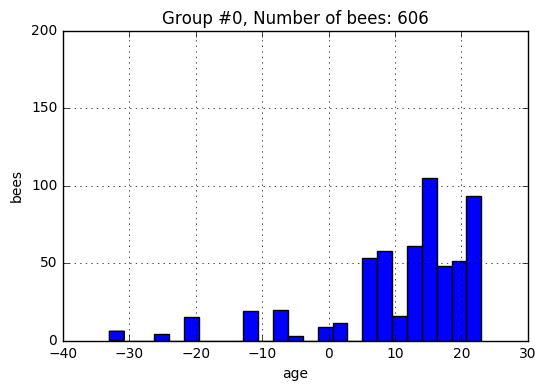

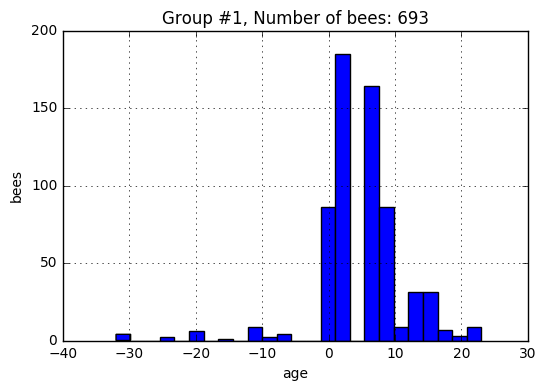

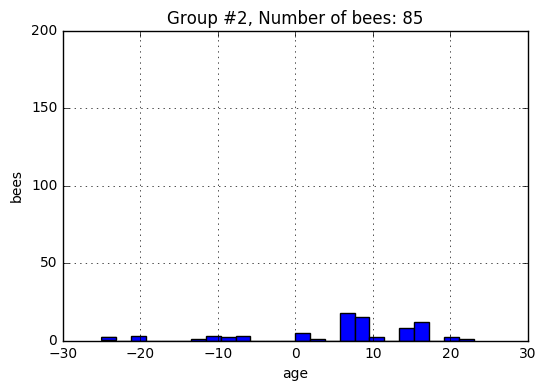

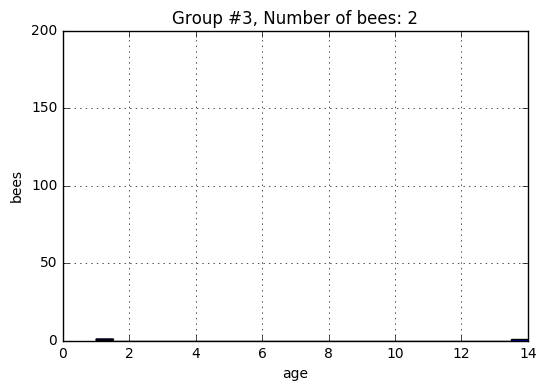

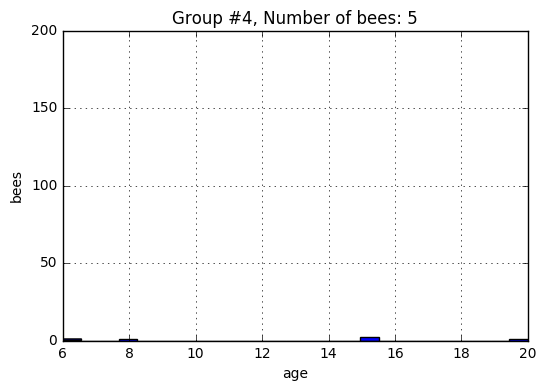

In [156]:
for g, group in gr:
    number = group.shape[0]
    ax = group.age.hist(bins=25)
    ax.set_title("Group #{}, Number of bees: {}".format(g,number))
    ax.set_xlabel("age")
    ax.set_ylabel("bees")
    #ax.set_xlim(-10,25)
    ax.set_ylim(0, 200)
    plt.figure()

In [163]:
dfccc.head()

,group,bee,age
0,0,750,NaN
1,0,5,7.0
2,0,10,17.0
3,0,12,10.0
4,0,2064,22.0


In [159]:
from scipy import stats

In [169]:
pv = stats.ttest_ind(dfccc.age[dfccc.group==0].dropna(), dfccc[dfccc.group==1].age.dropna())

In [170]:
pv.pvalue

2.2834754008554274e-33

In [195]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [197]:
p_values = []
group_n = dfccc.group.unique()
for i, j in [(i,j) for i in group_n for j in group_n]:
    age1 = dfccc[dfccc.group == i].age
    age2 = dfccc[dfccc.group == j].age
    k = (age2>age1.median()).sum()
    p_values.append({
        'i': i,
        'j': j,
        'pvalue': stats.binom_test(k, age2.shape[0])
    })

pd.DataFrame(p_values)

,i,j,pvalue
0,0,0,0.00054
1,0,1,0.00000
2,0,2,0.00000
3,0,3,0.50000
4,0,4,0.37500
5,1,0,0.00000
6,1,1,0.00000
7,1,2,0.08205
8,1,3,1.00000
9,1,4,0.37500


In [191]:
group_n

5

In [205]:
p_values = []
group_n = dfccc.group.unique()
for i, j in [(i,j) for i in group_n for j in group_n]:
    age1 = dfccc[dfccc.group == i].age
    age2 = dfccc[dfccc.group == j].age
    k = stats.ks_2samp(age1, age2)
    p_values.append({
        'i': i,
        'j': j,
        'pvalueleft': k[0],
        'pvalueright': k[1]
        
    })

pd.DataFrame(p_values)



,i,j,pvalueleft,pvalueright
0,0,0,0.00000,1.00000
1,0,1,0.46548,0.00000
2,0,2,0.29680,0.00000
3,0,3,0.54620,0.42197
4,0,4,0.28515,0.73883
5,1,0,0.46548,0.00000
6,1,1,0.00000,1.00000
7,1,2,0.22925,0.00055
8,1,3,0.30519,0.96919
9,1,4,0.46811,0.16101


In [199]:
stats.kstest([1,2,3,4,5],[1,2,3,4,5],)

TypeError: 'list' object is not callable

In [202]:
stats.kstest([1,2,3], [1,2,3])

TypeError: 'list' object is not callable